In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

from scipy.optimize import least_squares

In [72]:
width = 4 #width from the inside of jagged edge 
Length = 20
N_corners = 20 # number of corners of jagged edge
diffusive_edges = False

borderX = np.zeros(5)
borderY = np.zeros(5)
edgeStyle = np.zeros(4) #'source': 2,'drain': 1,'mirror': 0,'rough': -1

_L2 = Length/2.
_w2 = width/2.

borderX = np.array([-1])*_L2
borderY = np.array([-1])*_w2

#make top jagged edge
_tmpX = np.linspace(-_L2,_L2,N_corners*2+1)
_tmpY = np.zeros(N_corners*2+1) + _w2
_tmpY[1::2] += Length/N_corners/2.
borderX = np.append(borderX,_tmpX)
borderY = np.append(borderY,_tmpY)
#make bottom jagged edge
borderX = np.append(borderX,_tmpX[::-1])
borderY = np.append(borderY,-_tmpY[::-1])
#define edge properties
edgeStyle = np.array([2])
edgeStyle = np.append(edgeStyle,np.zeros(N_corners*2))
edgeStyle = np.append(edgeStyle,np.array([1]))
edgeStyle = np.append(edgeStyle,np.zeros(N_corners*2))
if diffusive_edges:
    edgeStyle[edgeStyle==0] = -1

#set the limits for coarse-grained 2D histogram
_w2a =_w2 + Length/N_corners/2.
boxRange = [[-_L2,_L2],
            [-_w2a,_w2a]]

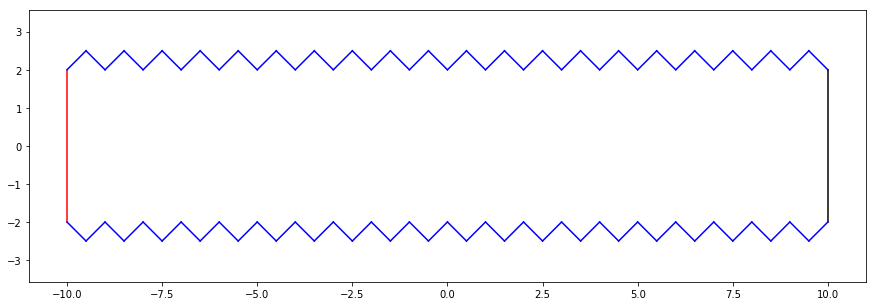

In [73]:
fig = plt.figure(figsize = (15,5))
_colors = ['b','k','r','y'] # red is source, black is drain, blue is specular edges, yellow is diffusive edges

for ind,style in enumerate(edgeStyle):
    plt.plot(borderX[ind:ind+2],borderY[ind:ind+2],_colors[int(style)])
plt.axis('equal')
plt.show()
#plt.cla()

In [38]:
np.savez('J3_rectangle_4x20um.npz', borderX=borderX, 
         borderY=borderY, edgeStyle=edgeStyle, boxRange=boxRange)